In [1]:
import pandas as pd


# Load the dataset from the CSV file
csv_file = 'train.csv'  # Replace with the actual file path if it's not in the same directory as your notebook
df = pd.read_csv(csv_file)

# Display the DataFrame
df.head()

,id,Date,Open,Close,Volume,Strategy
0,0,2015-06-01,66.208486,75.609978,298506300,Hold
1,1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2,2015-06-15,47.701942,71.140831,250670900,Buy
3,3,2015-06-22,54.754816,72.881344,223614300,Hold
4,4,2015-06-29,48.031899,66.284718,406814900,Buy


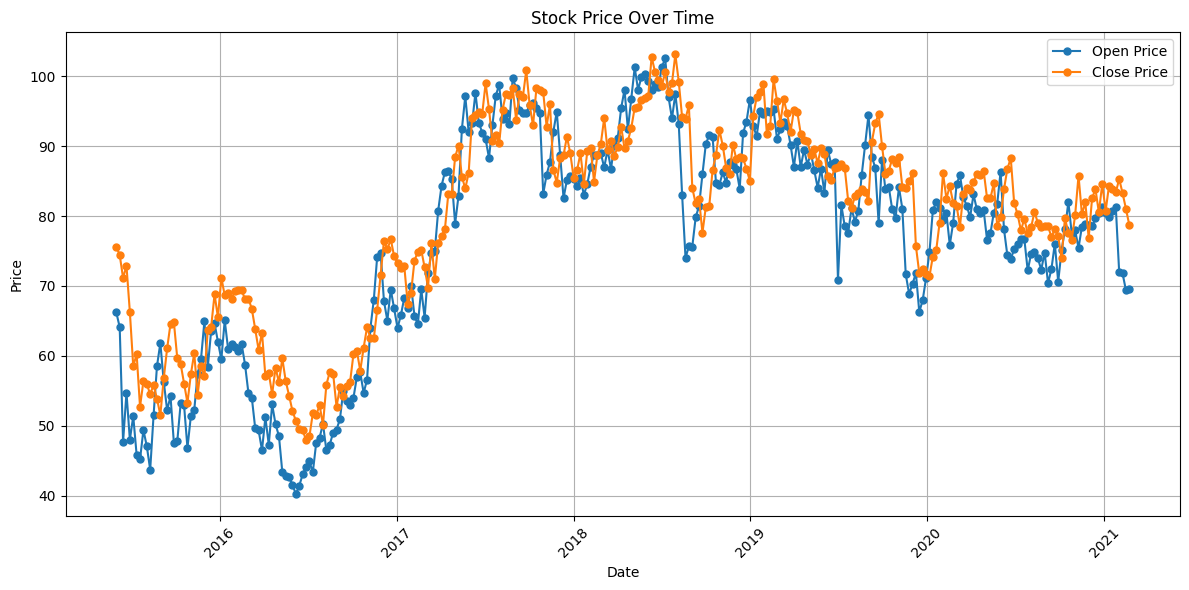

In [2]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Create a line chart
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the 'Open' and 'Close' prices
plt.plot(df.index, df['Open'], label='Open Price', linestyle='-', marker='o', markersize=5)
plt.plot(df.index, df['Close'], label='Close Price', linestyle='-', marker='o', markersize=5)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()




In [3]:
print(df.columns)

Index(['id', 'Open', 'Close', 'Volume', 'Strategy'], dtype='object')


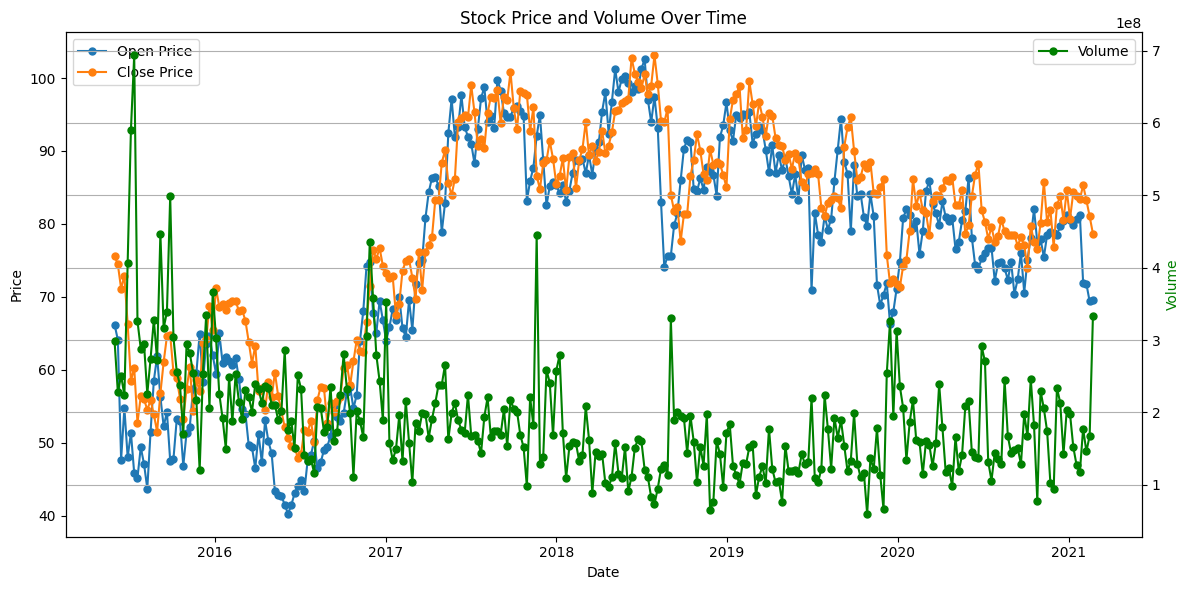

In [4]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the 'Open' and 'Close' prices on the first axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.plot(df.index, df['Open'], label='Open Price', linestyle='-', marker='o', markersize=5)
ax1.plot(df.index, df['Close'], label='Close Price', linestyle='-', marker='o', markersize=5)
ax1.legend(loc='upper left')

# Create a second axis for the 'Volume'
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='g')
ax2.plot(df.index, df['Volume'], color='g', label='Volume', linestyle='-', marker='o', markersize=5)
ax2.legend(loc='upper right')

# Set the title
plt.title('Stock Price and Volume Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

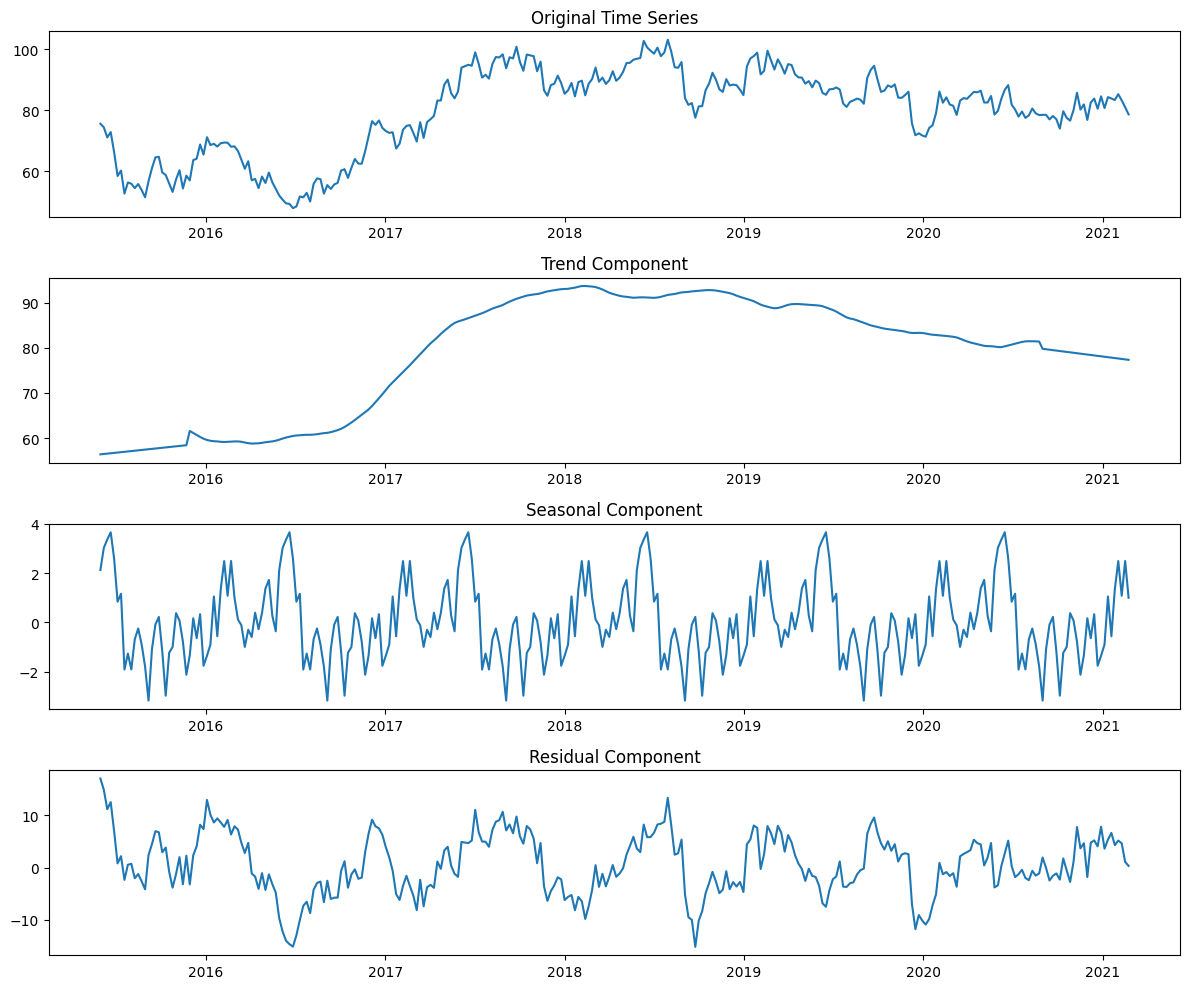

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Extract the 'Close' prices as a time series
time_series = df['Close']

# Perform time series decomposition (additive method)
result = seasonal_decompose(time_series, model='additive', extrapolate_trend='freq')

# Visualize the decomposition components
plt.figure(figsize=(12, 10))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original')
plt.title('Original Time Series')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Mean Squared Error: 29.61


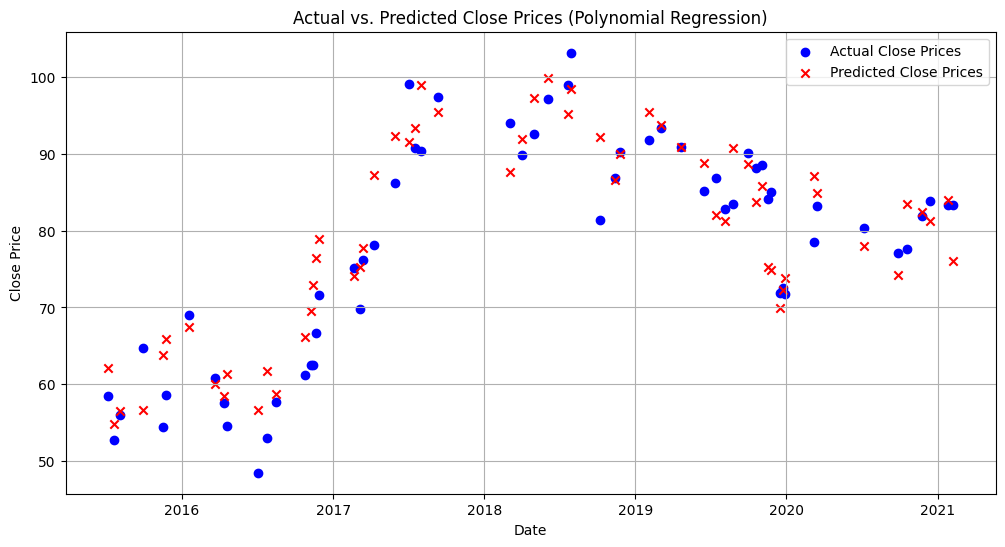

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Features (X) and Target (y)
X = df[['Open', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression with degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Close Prices', color='blue')
plt.scatter(y_test.index, y_pred, label='Predicted Close Prices', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Features (X) and Target (y)
X = df[['Open', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regression with degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Create a DataFrame with the actual and predicted close prices
predictions_df = pd.DataFrame({'Actual_Close': y_test, 'Predicted_Close': y_pred})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

Mean Squared Error: 29.61
